In [1]:
#Import necessary libraries
import pandas as pd  #For data manipulation and analysis
import numpy as np  #For mathematical operations and working with arrays
import matplotlib.pyplot as plt  #For basic plotting and visualization
import seaborn as sns  #For advanced data visualization
from sklearn.preprocessing import LabelEncoder  #To convert categorical data into numeric form
from sklearn.model_selection import train_test_split  #To split the dataset into training and testing sets
from sklearn.tree import DecisionTreeClassifier  #Decision Tree algorithm for classification tasks
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  #For evaluating model performance
from sklearn import tree  #For visualizing and working with decision trees
from sklearn.naive_bayes import GaussianNB  #Naive Bayes algorithm for classification

In [2]:
#URL of the dataset (in this case, a CSV file hosted on GitHub)
url = 'https://raw.githubusercontent.com/velcheiana/datasets/refs/heads/main/adult.csv'

#Reading the dataset into a pandas DataFrame
df = pd.read_csv(url, na_values=["?"])

#Display 10 random sample rows from the dataset to check the data
df.sample(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
11296,21,Private,88373,HS-grad,9,Married-civ-spouse,Other-service,Other-relative,White,Female,0,0,16,United-States,<=50K
44225,33,NaN,202366,HS-grad,9,Divorced,NaN,Unmarried,White,Female,0,0,32,United-States,<=50K
44731,36,Private,66173,Assoc-acdm,12,Married-civ-spouse,Sales,Wife,White,Female,0,0,15,United-States,<=50K
1421,45,Private,282172,Assoc-acdm,12,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K
40052,20,Private,55465,HS-grad,9,Never-married,Other-service,Own-child,White,Male,0,0,35,United-States,<=50K
34713,37,Private,118681,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,38,Puerto-Rico,<=50K
2589,41,Private,152617,HS-grad,9,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,United-States,<=50K
10609,45,Private,154237,HS-grad,9,Divorced,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
4746,49,Private,133351,HS-grad,9,Married-civ-spouse,Craft-repair,Wife,Black,Female,0,0,40,United-States,<=50K
19186,53,Private,358056,11th,7,Divorced,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K


In [3]:
print(df.info()) #used to display a summary of information about a DataFrame structure, including the number of rows, columns, data types, non-null values, and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


In [4]:
#To replace missing values with the mode (the most frequently occurring value) because the mode represents the common value in that column.
for col in ['workclass', 'occupation', 'native-country']:
    df[col] = df[col].fillna(df[col].mode()[0])

print(df)

       age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18       Private  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishin

In [5]:
print(df.isnull().sum()) #Check for null values in the DataFrame

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [6]:
df.describe() #used to generate descriptive statistics (such as mean, median, standard deviation, and quartiles) for numerical columns in a DataFrame

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
#To find the count/frequency of each unique value in every column in the dataframe
columns = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship',
           'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

for col in columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")

Value counts for age:
age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64


Value counts for workclass:
workclass
Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


Value counts for fnlwgt:
fnlwgt
203488    21
190290    19
120277    19
125892    18
126569    18
          ..
188488     1
285290     1
293579     1
114874     1
257302     1
Name: count, Length: 28523, dtype: int64


Value counts for education:
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         5

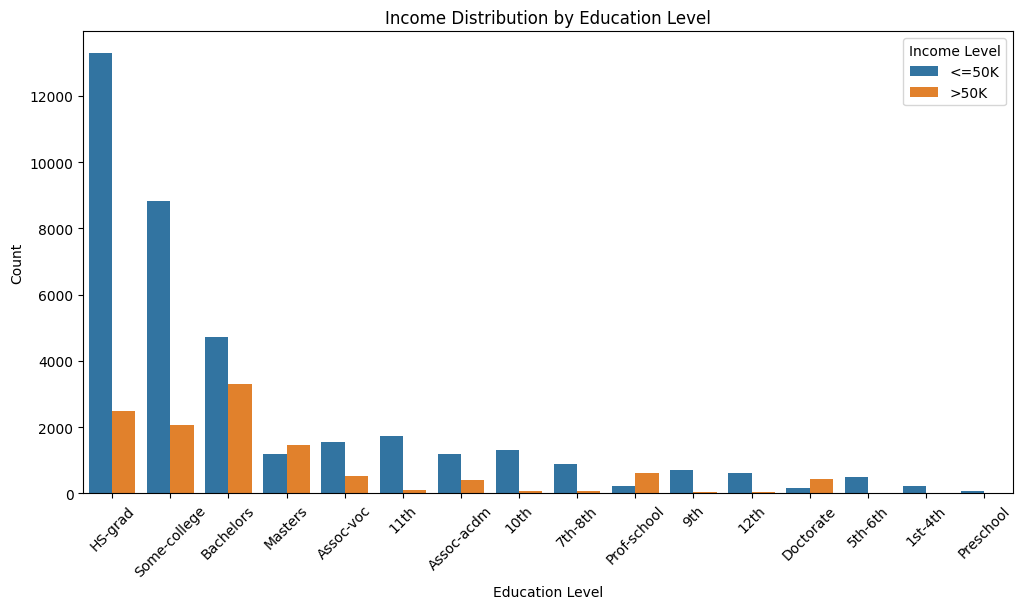

The bar plot shows the distribution of income levels across different education levels. It reveals a clear trend: individuals with higher education levels (such as Bachelors, Masters, or Doctorates) are more likely to earn above $50K, while those with lower education levels (like high school or below) predominantly fall into the <=$50K income group. This suggests a strong association between educational attainment and income, reflecting the impact of education on earning potential.


In [8]:
#Visualization 1: income distribution by education level
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size for the plot
plt.figure(figsize=(12, 6))

# Create a count plot to show the distribution of income by education level
# 'data' is the dataset, 'x' is the education level, 'hue' is the income level
# 'order' ensures the bars are ordered by the frequency of education levels
sns.countplot(data=df, x='education', hue='income', order=df['education'].value_counts().index)

# Set the title of the plot
plt.title('Income Distribution by Education Level')

# Label the x-axis
plt.xlabel('Education Level')

# Label the y-axis
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend with the title "Income Level"
plt.legend(title="Income Level")

# Display the plot
plt.show()

print ("The bar plot shows the distribution of income levels across different education levels. It reveals a clear trend: individuals with higher education levels (such as Bachelors, Masters, or Doctorates) are more likely to earn above $50K, while those with lower education levels (like high school or below) predominantly fall into the <=$50K income group. This suggests a strong association between educational attainment and income, reflecting the impact of education on earning potential.")

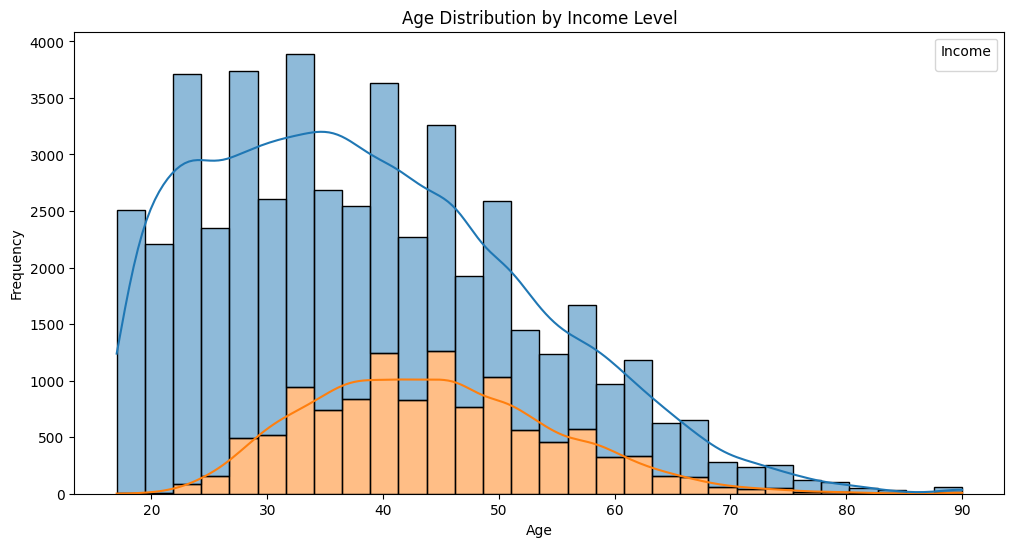

This histogram reveals that individuals earning over $50K tend to be concentrated in the 30-50 age range, while those earning $50K or less are distributed across a broader age range. The income peak around ages 30-40 highlights when higher earnings are more common.


In [9]:
#Visualization 2: Age distribution by income level
#Set up the figure size for the plot to ensure it is large enough for readability
plt.figure(figsize=(12, 6))

#Create a histogram to show the age distribution, separated by income level
sns.histplot(data=df, x='age', hue='income', multiple="stack", bins=30, kde=True)

#Add a title to the plot
plt.title("Age Distribution by Income Level")

#Label the x-axis to specify it represents age
plt.xlabel("Age")

#Label the y-axis to show it represents the frequency (number of individuals)
plt.ylabel("Frequency")

#Add a legend to indicate which color represents each income level
plt.legend(title="Income")

#Display the plot
plt.show()

print("This histogram reveals that individuals earning over $50K tend to be concentrated in the 30-50 age range, while those earning $50K or less are distributed across a broader age range. The income peak around ages 30-40 highlights when higher earnings are more common.")

In [10]:
#To convert categorical columns (workclass, education, etc.) to numeric
label_encoder = LabelEncoder()

#To identify and select all categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

#To convert each categorical column to numeric
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

#To display 10 random rows of data
df.sample(10)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
16342,32,3,293936,5,4,3,9,1,4,1,0,0,40,38,0
36659,31,3,50178,15,10,2,6,0,4,1,0,0,40,38,0
47915,29,3,82393,11,9,2,7,3,1,1,0,0,25,29,0
18098,48,3,199739,11,9,0,2,4,4,0,0,0,40,38,0
12917,23,3,308647,8,11,2,12,0,4,1,0,1887,40,38,1
33505,46,0,219967,9,13,2,3,0,4,1,0,0,40,38,1
41807,56,3,178353,15,10,2,9,0,4,1,0,0,40,38,1
7402,64,5,217380,14,15,0,9,1,4,1,0,2559,60,38,1
13337,33,3,179336,12,14,4,0,1,4,0,0,0,40,38,0
4552,28,1,136643,12,14,4,9,1,4,0,0,0,50,38,0


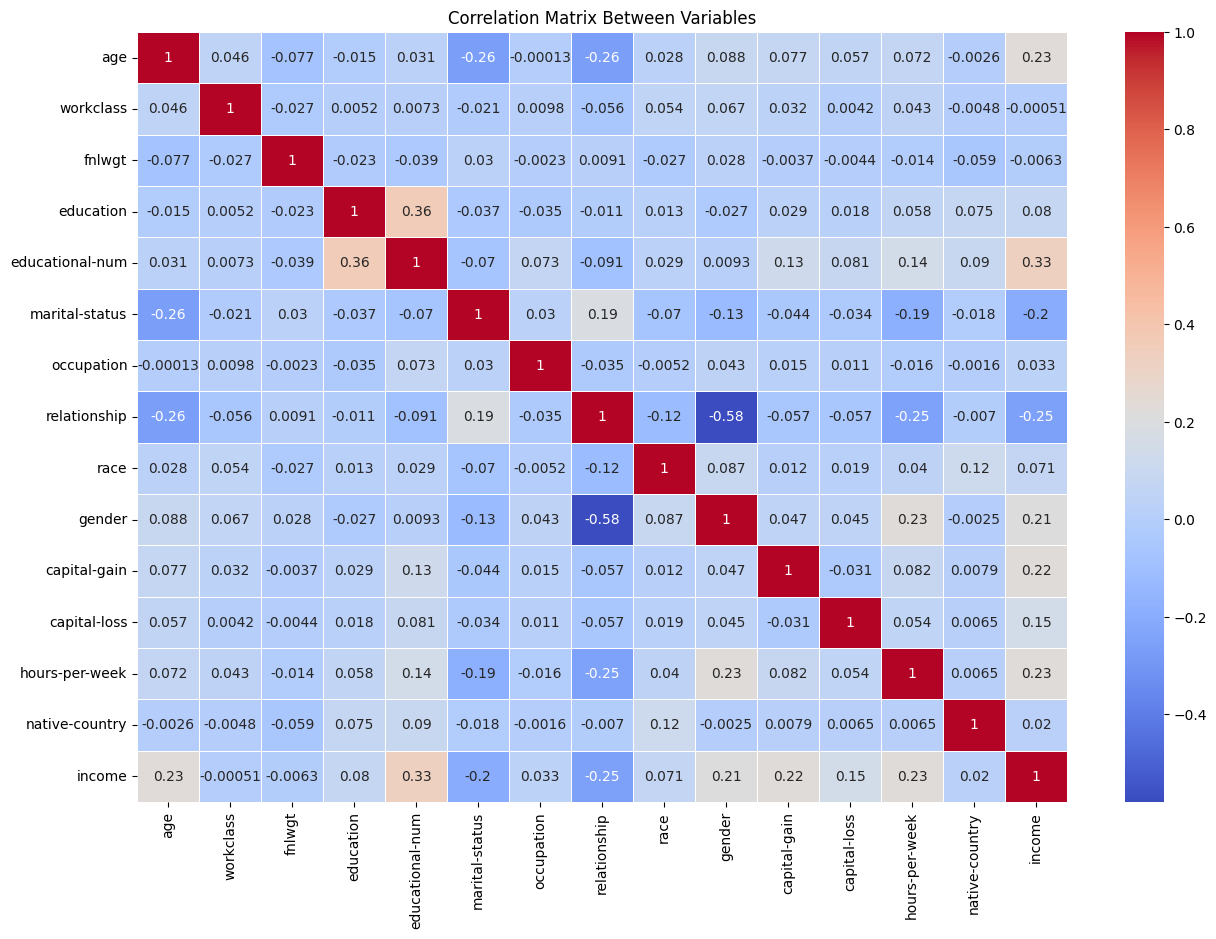

In [11]:
#Calculating the correlation matrix
corr_matrix = df.corr()

#Creating the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

#Adding a title
plt.title('Correlation Matrix Between Variables')
plt.show()

#Based on the correlation values, educational-num shows a positive correlation of 0.33 with income, suggesting that higher levels of education are associated with increased earnings.
#Additionally, capital-gain has a positive correlation of 0.22 with income, indicating that those with capital gains are more likely to earn higher incomes.
#On the other hand, marital-status and relationship have negative correlations with income at -0.2 and -0.25, respectively, implying that certain marital and family statuses may be linked to lower income levels.

In [12]:
X = df.drop(['income'], axis=1) #Create a variable X that contains all columns from the DataFrame df, except for the 'income' column
y = df['income'] #Create a variable y that contains the 'income' column from the DataFrame df

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
#To split the dataset into two parts: for training (80%) and for testing (20%).

In [14]:
X_train.shape, X_test.shape #To show the number of rows and columns

((39073, 14), (9769, 14))

In [15]:
#Criterion Entropy
#instantiate the DecisionTreeClassifier model with criterion entropy
dt_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

#fit the model
dt_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [16]:
#Use the trained decision tree classifier 'dt_en' to predict the labels for the test data 'X_test'
#The predictions will be stored in the variable 'y_pred_en'
y_pred_en = dt_en.predict(X_test)

In [17]:
print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en))) #Print the accuracy result

Model accuracy score with criterion entropy: 0.8449


In [18]:
# Predict on the training set and calculate accuracy
# The model makes predictions on the training set 'X_train' and stores them in 'y_train_pred'
y_train_pred = dt_en.predict(X_train)

# Calculate the accuracy on the training set by comparing predicted labels to actual labels
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the test set and calculate accuracy
# The model makes predictions on the test set 'X_test' and stores them in 'y_test_pred'
y_test_pred = dt_en.predict(X_test)

# Calculate the accuracy on the test set by comparing predicted labels to actual labels
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print out the training and test accuracy with 4 decimal places
print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

# Evaluate whether the model is overfitting or underfitting based on training and test accuracy
if train_accuracy > test_accuracy:
    print("The model might be overfitting.")  # Higher training accuracy suggests overfitting
elif train_accuracy == test_accuracy:
    print("The model is likely to be well-balanced.")  # Equal accuracies suggest a good fit
else:
    print("The model might be underfitting.")  # Higher test accuracy suggests underfitting


Training accuracy: 0.8384
Test accuracy: 0.8449
The model might be underfitting.


[Text(0.5, 0.875, 'x[7] <= 0.5\nentropy = 0.796\nsamples = 39073\nvalue = [29676, 9397]'),
 Text(0.25, 0.625, 'x[4] <= 12.5\nentropy = 0.992\nsamples = 15869\nvalue = [8752, 7117]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[10] <= 5095.5\nentropy = 0.918\nsamples = 11142\nvalue = [7435, 3707]'),
 Text(0.0625, 0.125, 'entropy = 0.882\nsamples = 10613\nvalue = [7426, 3187]'),
 Text(0.1875, 0.125, 'entropy = 0.124\nsamples = 529\nvalue = [9, 520]'),
 Text(0.375, 0.375, 'x[10] <= 5095.5\nentropy = 0.854\nsamples = 4727\nvalue = [1317, 3410]'),
 Text(0.3125, 0.125, 'entropy = 0.914\nsamples = 3999\nvalue = [1315, 2684]'),
 Text(0.4375, 0.125, 'entropy = 0.027\nsamples = 728\nvalue = [2, 726]'),
 Text(0.75, 0.625, 'x[10] <= 7055.5\nentropy = 0.463\nsamples = 23204\nvalue = [20924, 2280]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[7] <= 4.5\nentropy = 0.398\nsamples = 22702\nvalue = [20910, 1792]'),
 Text(0.5625, 0.125, 'entropy = 0.287\nsamples = 20994\nvalue = [1994

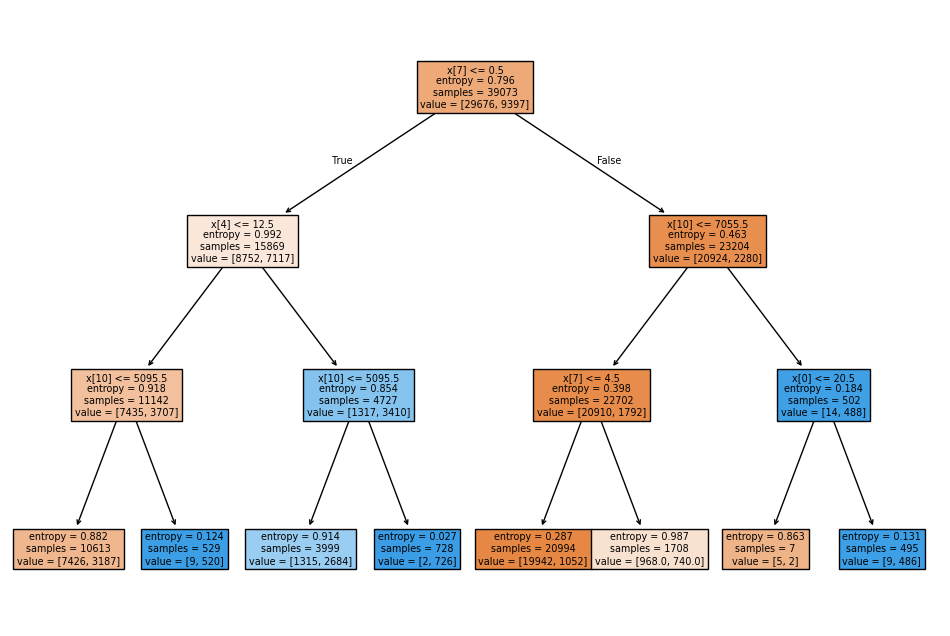

In [19]:
# Set the size of the plot to 12x8 inches for better visibility
plt.figure(figsize=(12, 8))

# Fit the decision tree model 'dt_en' to the training data 'X_train' and 'y_train'
# Then, plot the decision tree using the fitted model
# 'filled=True' fills the nodes with colors based on the class labels
tree.plot_tree(dt_en.fit(X_train, y_train), filled=True)

In [20]:
#Criterion Gini
#instantiate the DecisionTreeClassifier model with criterion gini index
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

#fit the model
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [21]:
#Use the trained decision tree classifier 'dt_gini' to predict the labels for the test data 'X_test'
#The predictions will be stored in the variable 'y_pred_gini'
y_pred_gini = dt_gini.predict(X_test)

In [22]:
print('Model accuracy score with criterion gini: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini))) #To print the accuracy result

Model accuracy score with criterion gini: 0.8449


In [23]:
#Predict on the training set and calculate accuracy
#The model makes predictions on the training set 'X_train' and stores them in 'y_train_pred'
y_train_pred = dt_gini.predict(X_train)

#Calculate the accuracy on the training set by comparing predicted labels to actual labels
train_accuracy = accuracy_score(y_train, y_train_pred)

#Predict on the test set and calculate accuracy
#The model makes predictions on the test set 'X_test' and stores them in 'y_test_pred'
y_test_pred = dt_gini.predict(X_test)

#Calculate the accuracy on the test set by comparing predicted labels to actual labels
test_accuracy = accuracy_score(y_test, y_test_pred)

#Print out the training and test accuracy with 4 decimal places
print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

#Evaluate whether the model is overfitting or underfitting based on training and test accuracy
if train_accuracy > test_accuracy:
    print("The model might be overfitting.")  # Higher training accuracy suggests overfitting
elif train_accuracy == test_accuracy:
    print("The model is likely to be well-balanced.")  # Equal accuracies suggest a good fit
else:
    print("The model might be underfitting.")  # Higher test accuracy suggests underfitting

Training accuracy: 0.8384
Test accuracy: 0.8449
The model might be underfitting.


[Text(0.5, 0.875, 'x[7] <= 0.5\ngini = 0.365\nsamples = 39073\nvalue = [29676, 9397]'),
 Text(0.25, 0.625, 'x[4] <= 12.5\ngini = 0.495\nsamples = 15869\nvalue = [8752, 7117]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[10] <= 5095.5\ngini = 0.444\nsamples = 11142\nvalue = [7435, 3707]'),
 Text(0.0625, 0.125, 'gini = 0.42\nsamples = 10613\nvalue = [7426, 3187]'),
 Text(0.1875, 0.125, 'gini = 0.033\nsamples = 529\nvalue = [9, 520]'),
 Text(0.375, 0.375, 'x[10] <= 5095.5\ngini = 0.402\nsamples = 4727\nvalue = [1317, 3410]'),
 Text(0.3125, 0.125, 'gini = 0.441\nsamples = 3999\nvalue = [1315, 2684]'),
 Text(0.4375, 0.125, 'gini = 0.005\nsamples = 728\nvalue = [2, 726]'),
 Text(0.75, 0.625, 'x[10] <= 7055.5\ngini = 0.177\nsamples = 23204\nvalue = [20924, 2280]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[7] <= 4.5\ngini = 0.145\nsamples = 22702\nvalue = [20910, 1792]'),
 Text(0.5625, 0.125, 'gini = 0.095\nsamples = 20994\nvalue = [19942, 1052]'),
 Text(0.6875, 0.125, '

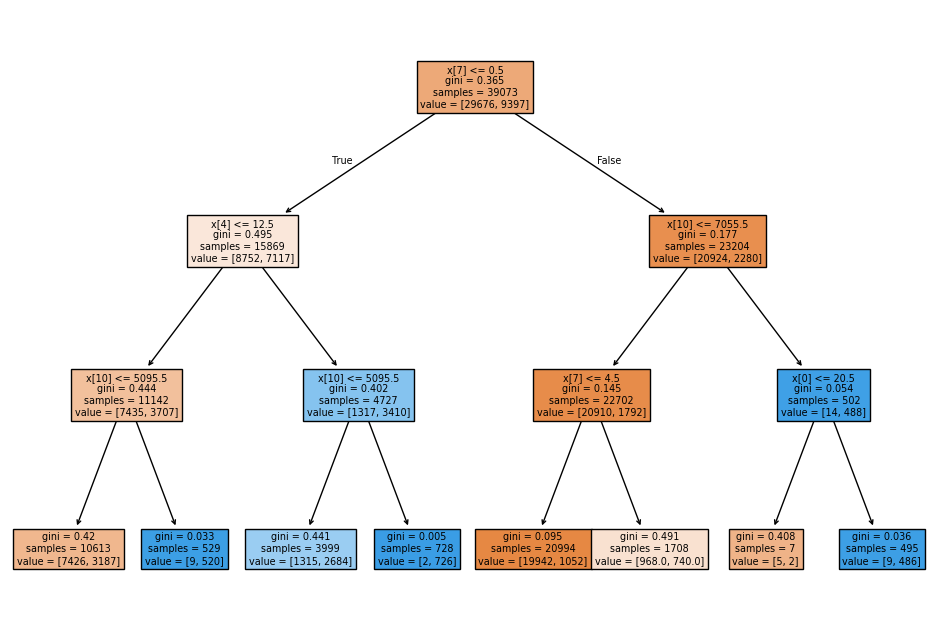

In [24]:
#Set the size of the plot to 12x8 inches for better visibility
plt.figure(figsize=(12, 8))

#Fit the decision tree model 'dt_gini' to the training data 'X_train' and 'y_train'
#Then, plot the decision tree using the fitted model
#'filled=True' fills the nodes with colors based on the class labels
tree.plot_tree(dt_gini.fit(X_train, y_train), filled=True)  #Create and display the tree

In [25]:
#Import the confusion_matrix function from sklearn.metrics
from sklearn.metrics import confusion_matrix

#Create the confusion matrix for predictions made by the decision tree using entropy
cm = confusion_matrix(y_test, y_pred_en)  # Calculate confusion matrix based on test labels and predicted labels
print("Confusion Matrix for Entropy-based Tree:\n", cm)

#Create the confusion matrix for predictions made by the decision tree using Gini Index
cm = confusion_matrix(y_test, y_pred_gini)  # Calculate confusion matrix based on test labels and predicted labels
print("Confusion Matrix for Gini-based Tree:\n", cm)

Confusion Matrix for Entropy-based Tree:
 [[7136  343]
 [1172 1118]]
Confusion Matrix for Gini-based Tree:
 [[7136  343]
 [1172 1118]]


In [26]:
print(classification_report(y_test, y_pred_en)) #To create and print the classification report
print(classification_report(y_test, y_pred_gini)) #To create and print the classification report

#Conclusion
#Both models demonstrate quite good performance in classifying income based on the available columns, both for the train set and the test set. If we look at the accuracy values of these two models, they produce the same and balanced results.

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7479
           1       0.77      0.49      0.60      2290

    accuracy                           0.84      9769
   macro avg       0.81      0.72      0.75      9769
weighted avg       0.84      0.84      0.83      9769

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7479
           1       0.77      0.49      0.60      2290

    accuracy                           0.84      9769
   macro avg       0.81      0.72      0.75      9769
weighted avg       0.84      0.84      0.83      9769



In [27]:
#Naive Bayes
nb_classifier = GaussianNB() #To instantiate a Gaussian Naive Bayes object from the scikit-learn library.
nb_classifier.fit(X_train, y_train) #To train the created Naive Bayes model with the feature data X_train and label y_train.

GaussianNB()

In [28]:
nb_y_pred = nb_classifier.predict(X_test) #To predict the labels using the previously trained Naive Bayes model.

In [29]:
#Create the confusion matrix for the Naive Bayes model predictions
cm = confusion_matrix(y_test, nb_y_pred)  #Calculate confusion matrix based on test labels and predicted labels
print("Confusion Matrix for Naive Bayes:\n", cm)

#Display the accuracy score for the Naive Bayes model
print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, nb_y_pred)))  #Show the accuracy result

Confusion Matrix for Naive Bayes:
 [[7099  380]
 [1580  710]]
Accuracy Score: 0.7994


In [30]:
print(classification_report(y_test, nb_y_pred)) #To print the classification report

#Conclusion
#If we look at the accuracy score of the naive model, it performs quite well with this income dataset; however, when compared to the decision tree, the decision tree still performs better for this dataset.

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7479
           1       0.65      0.31      0.42      2290

    accuracy                           0.80      9769
   macro avg       0.73      0.63      0.65      9769
weighted avg       0.78      0.80      0.77      9769



In [31]:
#Logistic Regression

#Import the LogisticRegression class from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

#Create an instance of the Logistic Regression classifier
#'max_iter=200' sets the maximum number of iterations for the solver to converge
classifier = LogisticRegression(max_iter=200)

#Fit the logistic regression model to the training data
#The model learns the relationship between the features in 'X_train' and the target labels in 'y_train'
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [32]:
#Use the trained logistic regression classifier to predict the labels for the test data 'X_test'
y_pred_log = classifier.predict(X_test)

#Create a comparison table to show actual vs predicted labels
comparison_table = pd.DataFrame({"y_test": y_test, "y_pred": y_pred_log})

#Display the first few rows of the comparison table
print(comparison_table.head())

       y_test  y_pred
7762        0       0
23881       0       0
30507       1       1
28911       0       0
19484       0       0


In [33]:
#Calculate and print the accuracy score of the logistic regression model
#This compares the actual test labels 'y_test' with the predicted labels 'y_pred_log'
print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_log)))

Accuracy Score: 0.7985


In [34]:
#Create the confusion matrix for the logistic regression model predictions
cmatrix = confusion_matrix(y_test, y_pred_log)  # Calculate confusion matrix based on test labels and predicted labels

#Print the confusion matrix
print("Confusion Matrix:\n", cmatrix)

Confusion Matrix:
 [[7107  372]
 [1596  694]]


In [35]:
#Print the classification report for the logistic regression model predictions
#This report includes precision, recall, F1-score, and support for each class
print(classification_report(y_test, y_pred_log))

#Conclusion
#The accuracy of this logistic regression model can be considered good; however, when compared to the accuracy of other models, this logistic regression model has the lowest accuracy.
#From the three data points: Model accuracy score with criterion gini: 0.8449, Model accuracy score with criterion entropy: 0.8449, Model Naive Bayes: 0.7994, Model Logistic Regression: 0.7985.
#Therefore, for income prediction, it is recommended to use: 1. Entropy or Gini, 2. Naive, 3. Logistic Regression.

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7479
           1       0.65      0.30      0.41      2290

    accuracy                           0.80      9769
   macro avg       0.73      0.63      0.65      9769
weighted avg       0.78      0.80      0.77      9769

